In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(f"IMDB Dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [5]:
df.shape

(50000, 2)

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [8]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

### One Hot Encounter

In [9]:


df['sentiment']=df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [10]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [11]:
df['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

## Train and test split

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
train_data,test_data=train_test_split(df,test_size=0.2,random_state=42)

In [14]:
train_data.shape

(40000, 2)

In [15]:

test_data.shape

(10000, 2)

In [16]:
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['review'])

In [17]:
X_train_seq=pad_sequences(tokenizer.texts_to_sequences(train_data['review']),maxlen=200)
X_test_seq=pad_sequences(tokenizer.texts_to_sequences(test_data['review']),maxlen=200)

In [18]:
X_train_seq

array([[1935,    1, 1200, ...,  205,  351, 3856],
       [   3, 1651,  595, ...,   89,  103,    9],
       [   0,    0,    0, ...,    2,  710,   62],
       ...,
       [   0,    0,    0, ..., 1641,    2,  603],
       [   0,    0,    0, ...,  245,  103,  125],
       [   0,    0,    0, ...,   70,   73, 2062]])

In [19]:
X_test_seq

array([[   0,    0,    0, ...,  995,  719,  155],
       [  12,  162,   59, ...,  380,    7,    7],
       [   0,    0,    0, ...,   50, 1088,   96],
       ...,
       [   0,    0,    0, ...,  125,  200, 3241],
       [   0,    0,    0, ..., 1066,    1, 2305],
       [   0,    0,    0, ...,    1,  332,   27]])

In [20]:
y_train=train_data['sentiment']
y_test=test_data['sentiment']

In [21]:
y_train

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64

In [22]:
y_test

33553    1
9427     1
199      0
12447    1
39489    0
        ..
28567    0
25079    1
18707    1
15200    0
5857     1
Name: sentiment, Length: 10000, dtype: int64

In [23]:
model=Sequential()
model.add(Embedding(input_dim=5000,output_dim=128,input_length=200))
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_seq, y_train, batch_size=64, epochs=5, validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 134s 260ms/step - accuracy: 0.7146 - loss: 0.5454 - val_accuracy: 0.8016 - val_loss: 0.4621
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 143s 285ms/step - accuracy: 0.8125 - loss: 0.4212 - val_accuracy: 0.7686 - val_loss: 0.4751
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 135s 270ms/step - accuracy: 0.8510 - loss: 0.3538 - val_accuracy: 0.8468 - val_loss: 0.3691
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 194s 387ms/step - accuracy: 0.8642 - loss: 0.3242 - val_accuracy: 0.8575 - val_loss: 0.3322
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 190s 380ms/step - accuracy: 0.8906 - loss: 0.2721 - val_accuracy: 0.8702 - val_loss: 0.3159


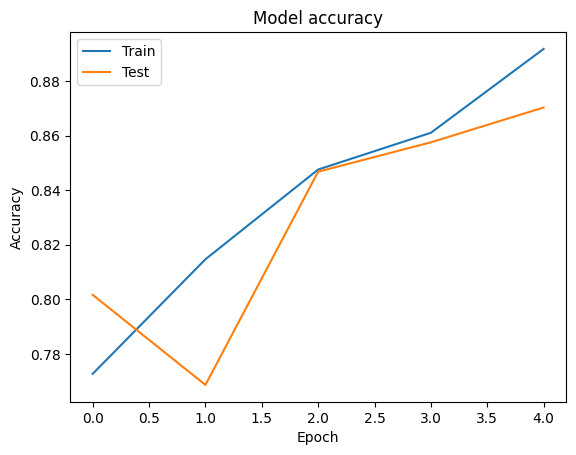

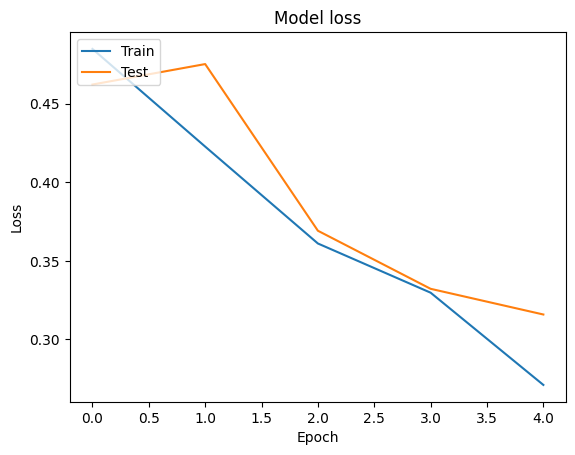

In [25]:
# prompt: make a graph for model

import matplotlib.pyplot as plt

# Assuming 'history' object contains the training history from model.fit
# history = model.fit(...)

# Plot training & validation accuracy values
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [26]:

model.save("model.h5")

In [27]:
import joblib
joblib.dump(tokenizer,"tokenizer.pkl")

['tokenizer.pkl']

In [28]:
loss,accuracy = model.evaluate(X_test_seq,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.8750 - loss: 0.3029


In [29]:
print(loss)

0.3060775697231293


In [30]:
print(accuracy)

0.8740000128746033


In [31]:
# Build Predictive analysis

def predict_sentiment(review):
  sequene=tokenizer.texts_to_sequences([review])
  padded_sequence=pad_sequences(sequene,maxlen=300)
  prediction=model.predict(padded_sequence)
  sentiment="positive" if prediction[0][0] > 0.5 else 'negative'
  return sentiment

predict_sentiment("This movie was awsome")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


'negative'